In [1]:
from fastai import *
from fastai.collab import *

In [2]:
path = untar_data(URLs.ML_SAMPLE)

In [3]:
ratings = pd.read_csv(path/'ratings.csv')
series2cat(ratings,'userId','movieId')

In [4]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [5]:
y_range = [0,5.5]

In [6]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [7]:
learn.fit_one_cycle(4, 5e-3)

epoch,train_loss,valid_loss
1,1.768721,1.408982
2,0.911547,0.678153
3,0.661305,0.652918
4,0.572038,0.649247


In [16]:
user,item,title = 'userId','movieId','title'

In [17]:
path = Config.data_path()/'ml-100k'

In [18]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=[user,item,'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [35]:
movies = pd.read_csv(path/'u.item',delimiter='|',encoding='latin-1',header=None,
                     names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])

In [36]:
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
rating_movies = ratings.merge(movies[[item,title]])

In [40]:
rating_movies.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [42]:
data = CollabDataBunch.from_df(rating_movies, seed=42, pct_val=0.1, item_name=title)

In [46]:
y_range = [0,5.5]

In [47]:
learn = collab_learner(data,n_factors=40,y_range=y_range,wd=1e-1)

In [52]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


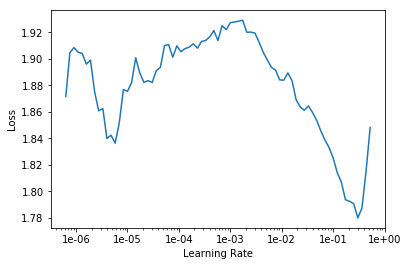

In [53]:
learn.recorder.plot(skip_end=15)

In [54]:
learn.fit_one_cycle(5,5e-3)

epoch,train_loss,valid_loss
1,0.914068,0.939192
2,0.864281,0.885451
3,0.765414,0.836149
4,0.627735,0.818465
5,0.580063,0.817320


In [67]:
learn.save('proasdd')

In [60]:
g = rating_movies.groupby(title)['rating'].count()

In [62]:
top_movies = g.sort_values(ascending=False).index.values[:1000]

In [69]:
movie_bias = learn.bias(top_movies,is_item=True)

In [79]:
rating_mean = rating_movies.groupby(title)['rating'].mean()
movie_rating = [(b,i,rating_mean.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [81]:
item0 = lambda o:o[0]

In [84]:
sorted(movie_rating, key=item0)[:15]

[(tensor(-0.3720),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3370),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.3154), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2972), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2445), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2364), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2344), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2278), 'Leave It to Beaver (1997)', 1.8409090909090908),
 (tensor(-0.2268), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2239), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2235), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2189), 'Showgirls (1995)', 1.9565217391304348),
 (tensor(-0.2171), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2104), 'Beverly Hills Ninja (1997)', 2.3125),
 (tensor(-0.2069), 'Beautician and the Beast, The (1

In [85]:
sorted(movie_rating, key=item0,reverse=True)[:15]

[(tensor(0.6361), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5821), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5581), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5473), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5458), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5411), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5405), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5015), 'Apt Pupil (1998)', 4.1),
 (tensor(0.5000), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4989), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.4856), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4789), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4701), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4654), 'Close Shave, A (1995)', 4.491071428571429),
 (tensor(0.4632), 'Usual Suspects, The (1995)', 4.385767790262173)]

In [92]:
movie_weights = learn.weight(top_movies, is_item=True)
movie_pca = movie_weights.pca(3)

In [95]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

In [103]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.0621), 'Wrong Trousers, The (1993)'),
 (tensor(1.0533), 'Casablanca (1942)'),
 (tensor(1.0342), 'Close Shave, A (1995)'),
 (tensor(1.0139), 'When We Were Kings (1996)'),
 (tensor(0.9959), 'Lawrence of Arabia (1962)'),
 (tensor(0.9796), 'Citizen Kane (1941)'),
 (tensor(0.9578), 'Chinatown (1974)'),
 (tensor(0.9405), 'Secrets & Lies (1996)'),
 (tensor(0.9402), '12 Angry Men (1957)'),
 (tensor(0.9349),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)')]

In [104]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.3477), "McHale's Navy (1997)"),
 (tensor(-1.2797), 'Jungle2Jungle (1997)'),
 (tensor(-1.2658), 'Home Alone 3 (1997)'),
 (tensor(-1.2203), 'D3: The Mighty Ducks (1996)'),
 (tensor(-1.1729), 'Congo (1995)'),
 (tensor(-1.1387), 'Leave It to Beaver (1997)'),
 (tensor(-1.1194), 'Flipper (1996)'),
 (tensor(-1.0985), 'Children of the Corn: The Gathering (1996)'),
 (tensor(-1.0929), 'Bio-Dome (1996)'),
 (tensor(-1.0762), 'Grease 2 (1982)')]

In [105]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [106]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.2417), 'Braveheart (1995)'),
 (tensor(1.1200), 'Titanic (1997)'),
 (tensor(1.1002), 'Raiders of the Lost Ark (1981)'),
 (tensor(0.9872), "It's a Wonderful Life (1946)"),
 (tensor(0.9143), 'Forrest Gump (1994)'),
 (tensor(0.8806), 'Hunt for Red October, The (1990)'),
 (tensor(0.8757), 'Independence Day (ID4) (1996)'),
 (tensor(0.8539), 'Pretty Woman (1990)'),
 (tensor(0.8347), "Mr. Holland's Opus (1995)"),
 (tensor(0.8308), 'American President, The (1995)')]

In [107]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-0.8464), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(-0.8051), 'Brazil (1985)'),
 (tensor(-0.7912), 'Trainspotting (1996)'),
 (tensor(-0.7835), 'Sweet Hereafter, The (1997)'),
 (tensor(-0.7604), 'Stupids, The (1996)'),
 (tensor(-0.7558), 'Keys to Tulsa (1997)'),
 (tensor(-0.7446), 'Beavis and Butt-head Do America (1996)'),
 (tensor(-0.7311), 'Cable Guy, The (1996)'),
 (tensor(-0.7278), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(-0.7222), 'Dead Man (1995)')]

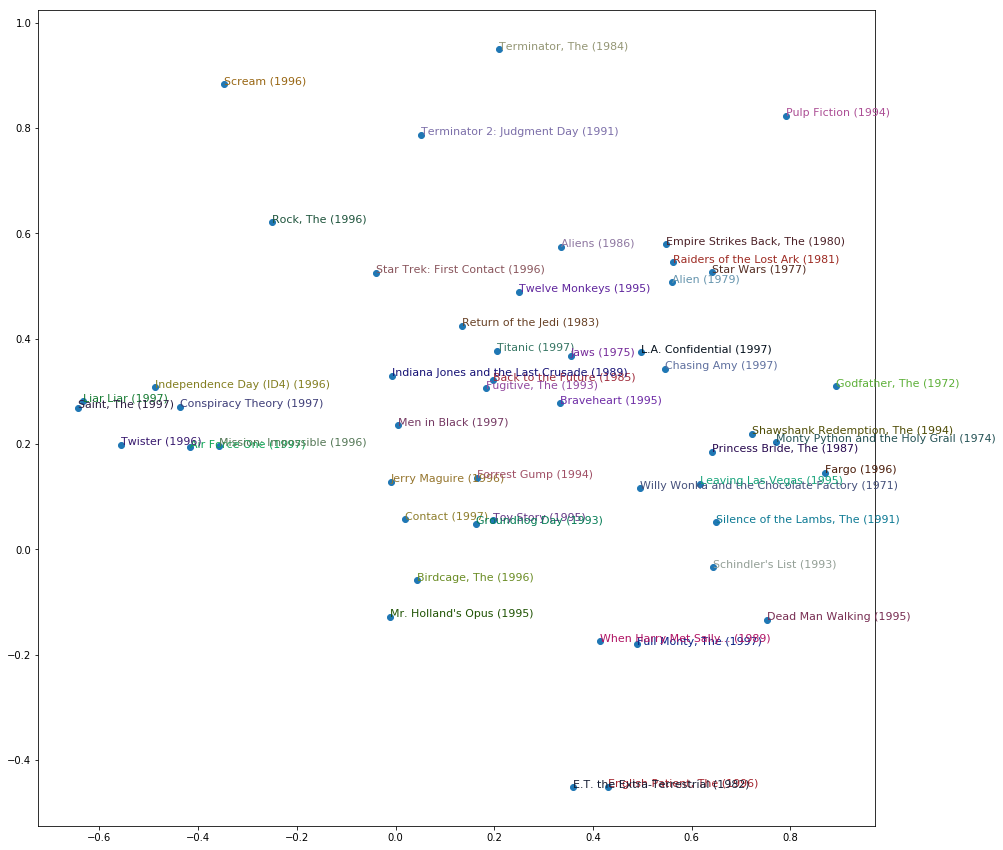

In [115]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()